# Importar librerias

In [18]:
import pandas as pd
%matplotlib inline  

## Cargar datos de casos confirmados por pais

In [19]:
global_confirmed  = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
                               sep = ',',
                                header = 0,
                                index_col = [1],
                               parse_dates = True)
global_deaths  = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
                               sep = ',',
                                header = 0,
                                index_col = [1],
                               parse_dates = True)

In [20]:
# Se desechan algunas columnas innecesarias y se convierte el índice a formato datetime
global_confirmed = global_confirmed.drop(columns=['Province/State','Lat','Long']).T
global_confirmed.index = pd.to_datetime(global_confirmed.index)
# Se desechan algunas columnas innecesarias y se convierte el índice a formato datetime
global_deaths = global_deaths.drop(columns=['Province/State','Lat','Long']).T
global_deaths.index = pd.to_datetime(global_deaths.index)

# Cargar datos de regiones, paises y GPS

In [21]:
global_confirmed_headers = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv',
                               sep = ',',
                                header = 0,
                                usecols = [0,1,2,3])
global_deaths_headers = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv',
                               sep = ',',
                                header = 0,
                                usecols = [0,1,2,3])

Saber el nombre de un pais en función de la posición en la tabla de datos de paises, regiones y GPS

In [22]:
global_confirmed_headers['Country/Region'][4]

'Angola'

Saber el índice de un pais para poder localizar donde están sus datos de región y GPS. Si solo hay un resultado devuelve un número, si hay varios lo devuelve en forma de máscara

In [23]:
global_confirmed.columns.get_loc("Germany")

120

In [24]:
global_confirmed.columns.get_loc("Australia")

array([False, False, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

La máscara se puede utilizar para consultar directamente los datos

In [25]:
global_confirmed_headers.loc[global_confirmed.columns.get_loc("France")]

,Province/State,Country/Region,Lat,Long
107,French Guiana,France,3.9339,-53.1258
108,French Polynesia,France,-17.6797,149.4068
109,Guadeloupe,France,16.2500,-61.5833
110,Mayotte,France,-12.8275,45.1662
111,New Caledonia,France,-20.9043,165.6180
112,Reunion,France,-21.1351,55.2471
113,Saint Barthelemy,France,17.9000,-62.8333
114,St Martin,France,18.0708,-63.0501
115,Martinique,France,14.6415,-61.0242
116,NaN,France,46.2276,2.2137


In [26]:
global_confirmed_headers.loc[global_confirmed.columns.get_loc("US")]

Province/State        NaN
Country/Region         US
Lat               37.0902
Long             -95.7129
Name: 225, dtype: object

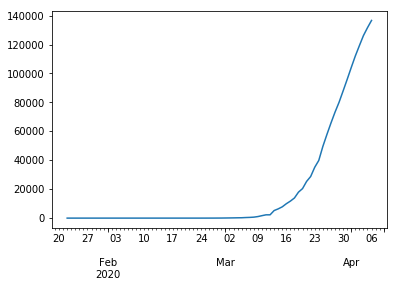

In [27]:
global_confirmed['Spain'].plot()

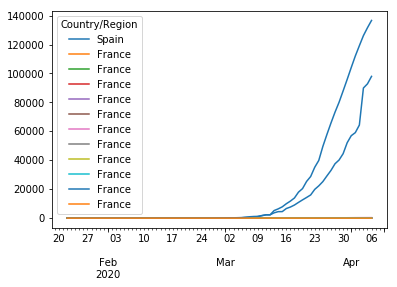

In [28]:
global_confirmed[['Spain','France']].plot()

In [29]:
global_confirmed.index

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
               '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
               '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
               '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
               '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
               '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
               '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
               '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
               '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
               '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
      

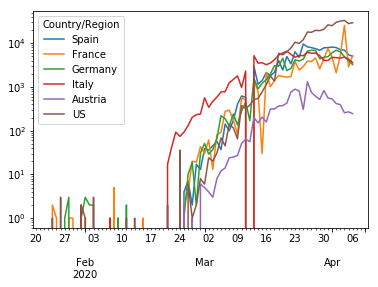

In [31]:
global_confirmed.iloc[:,[201, 116, 120, 137, 16, 225]].diff(periods=1).plot(logy=True)

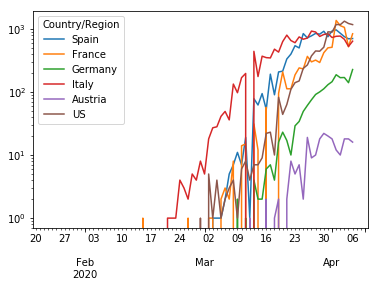

In [32]:
global_deaths.iloc[:,[201, 116, 120, 137, 16, 225]].diff(periods=1).plot(logy=True)

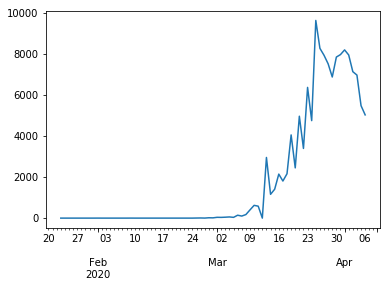

In [37]:
global_confirmed['Spain'].diff().plot()

Se pueden crear nuevas series sumando las de otros paises. Por ejemplo, obtener los valores de la EU (TBC). También se puede usar la función sum() de un dataframe

In [15]:
global_confirmed['EU']=global_confirmed.iloc[:,110]+global_confirmed.iloc[:,111]

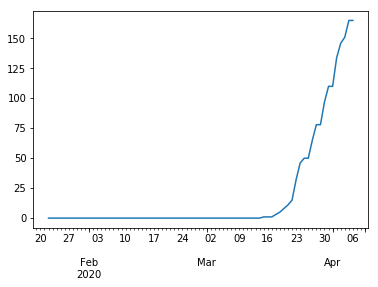

In [16]:
global_confirmed['EU'].plot()

KeyError: 'EU'